<h1>
    Nanostructured Materials (Ene 20 Gpo 1): <br>
    <b>Final Examination</b>
</h1>

<table width="75%" align="center">
    <tr>
        <th align="left" colspan="2">
            <h2><b>Author(s)<b>:</b></h2>
        </th>
    </tr>
    <tr>
        <td><h3>Osamu Katagiri-Tanaka</h3></td>
        <td><h4>A01212611@itesm.mx</h4></td>
    </tr>
</table>

In [1]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

import intersect

---
<h1>Figure 1.</h1>

Equation 4:

$$ G_1 = \frac{\pi {D_0}^2}{4} \left(\gamma_M + \gamma_l\right) $$

In [2]:
def G_1_(D_0, gamma_M, gamma_l):
    
    fac1 = (np.pi * D_0**2) / 4;
    fac2 = gamma_M + gamma_l;
    
    res = fac1*fac2;
    return res

Equation 8 & 12:

$$
G_2 = 
\left\{
\begin{aligned}
     \frac{\pi D^2}{4} \frac{\gamma_M}{1+cos(\theta)} \left[ 2 - \left( 1 + cos(\theta) \right) cos(\theta_c) \right] + \frac{\pi {D_0}^2}{4} \gamma_s \\
     \frac{\pi D^2}{4} \gamma_M \left[ 2 - 2 cos(\theta) - {sin}^2(\theta) cos(\theta_c) \right] + \frac{\pi {D_0}^2}{4} \gamma_s
\end{aligned}
\right.
$$

In [3]:
def G_2_(D, D_0, theta, theta_c, gamma_M, gamma_s):
    
    theta_rad   = np.radians(theta)
    theta_c_rad = np.radians(theta_c)
    
    fac1_1 = (np.pi * D**2) / 4
    fac1_2 = gamma_M / (1 + np.cos(theta_rad))
    fac1_3 = 2 - (1 + np.cos(theta_rad)) * np.cos(theta_c_rad)
    sum1_1 = fac1_1 * fac1_2 * fac1_3
    sum1_2 = (np.pi * D_0**2 * gamma_s) / 4
    res1   = sum1_1 + sum1_2
    
    fac2_1 = (np.pi * D**2 * gamma_M) / 4
    fac2_2 = 2 - 2 * np.cos(theta_rad) - np.sin(theta_rad)**2 * np.cos(theta_c_rad)
    sum2_1 = fac2_1 * fac2_2
    sum2_2 = (np.pi * D_0**2 * gamma_s) / 4
    res2   = sum2_1 + sum2_2
    
    res = []
    for i in range(len(theta)):
        if theta[i] < 90:
            res.append(res1[i]);
        else:
            res.append(-res2[i] + 2*np.nanmin(res1));
    
    return res

Equation 16:

$$ D = \sqrt[3]{ \frac{6 {sin}^3(\theta) {D_0}^2 t}{2 - 3 cos(\theta) + {cos}^3(\theta)} } $$

In [4]:
def D_(D_0, theta, t):
    
    theta_rad   = np.radians(theta)
    
    num = 6 * (np.sin(theta_rad)**3) * (D_0**2) * t
    den = 2 - 3 * np.cos(theta_rad) + np.cos(theta_rad)**3
    
    res = (num / den)**(1. / 3)
    return res

---
<h1>Plot</h1>

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

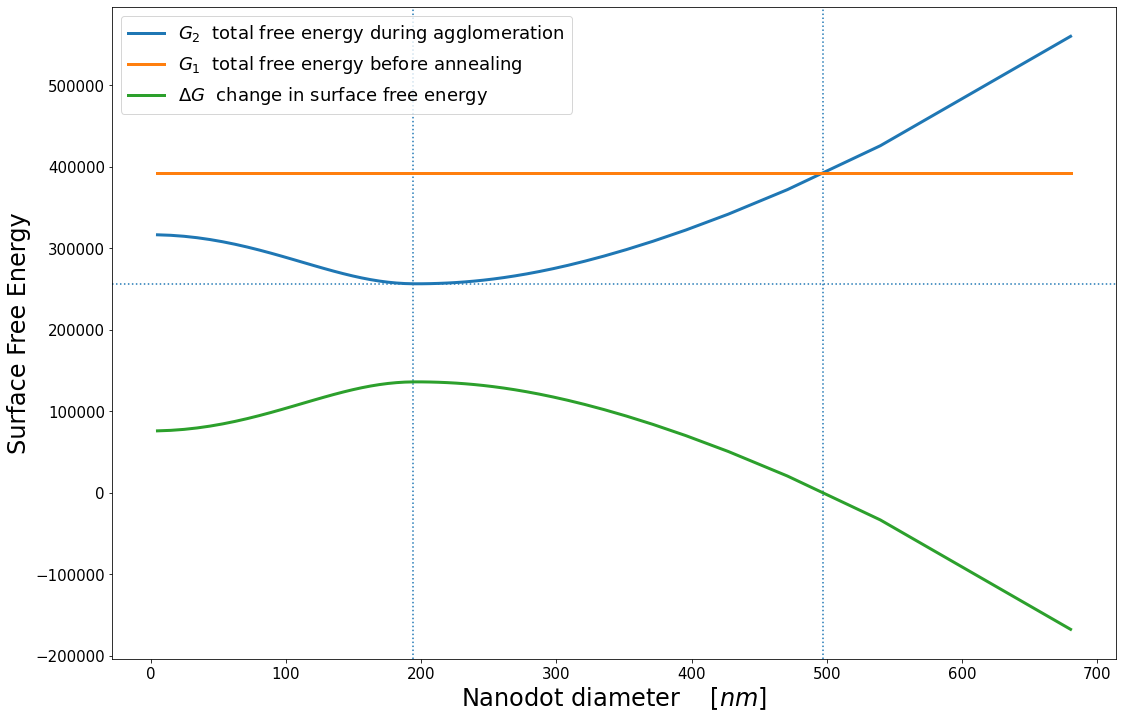

In [22]:
# INITIALIZATION
theta_c = 90; # degrees
gamma_M = 1;
gamma_s = 1;
gamma_l = 1;
D_0     = 500; # nm
t       = 10; # nm
n       = 100;

theta = np.linspace(0.0, 360, num=n);
D     = D_(D_0, theta, t);
G_1   = G_1_(D_0, gamma_M, gamma_l);
G_1   = np.linspace(G_1, G_1, num=n);
G_2   = G_2_(D, D_0, theta, theta_c, gamma_M, gamma_s);

# PLOT
scale = 6;
fig, ax = plt.subplots(figsize=(3*scale, 2*scale));

# Find Starting Point
x,y = intersect.intersection(D,G_1,D,G_2)
plt.axvline(x=x, linestyle=':')
# Find Ending Point
x = D[G_2.index(np.nanmin(G_2))]
y = np.nanmin(G_2)
plt.axvline(x=x, linestyle=':')
plt.axhline(y=y, linestyle=':')

plt.plot(D, G_2,       '-', linewidth=3, label=r'$G_2$' + "  total free energy during agglomeration")
plt.plot(D, G_1,       '-', linewidth=3, label=r'$G_1$' + "  total free energy before annealing")
plt.plot(D, G_1 - G_2, '-', linewidth=3, label=r'$\Delta G$' + "  change in surface free energy")

#plt.plot(D, G_1 - G_2, '-', linewidth=3, label=r'$\Delta G$')

# ax.set(autoscale_on=False)
# plt.plot(T, C_prev, '--', linewidth=1, label='pre-Fitted curve')

# Print fitting parameters as plot legends
x = D[0]
y = G_1[0]
#plt.scatter(x, y, s=0, label=r'$\Delta H_{cal,ref} = $' + str(round(Delta_cal_H_ref, 2)) + r'$J {mol}^{-1}$')
#plt.scatter(x, y, s=0, label=r'$\Delta H_{vH,ref} = $' + str(round(Delta_v_H_ref, 2)) + r'$J {mol}^{-1}$')
#plt.scatter(x, y, s=0, label=r'$T_{ref} = $' + str(round(T_ref, 2)) + r'$K$')
#plt.scatter(x, y, s=0, label=r'$\Delta_{C_P} = $' + str(round(Delta_Cp, 2)) + r'$J K^{-1} {mol}^{-1}$')

# Display plots
plt.xlabel('Nanodot diameter' + '    ' + r'$[nm]$', fontsize=24);
plt.ylabel('Surface Free Energy', fontsize=24);
plt.legend(prop={'size': 18});
display(plt);